In [14]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

In [15]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [16]:
# Create train/test split
train_split = int(0.8 * len(X))  # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [17]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

In [19]:
from torch import nn
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

    def forward(self, x:torch.Tensor):
        return x * self.weights + self.bias

In [20]:
torch.manual_seed(42)
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
with torch.no_grad():
    y_preds = model_0(X_test)
print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


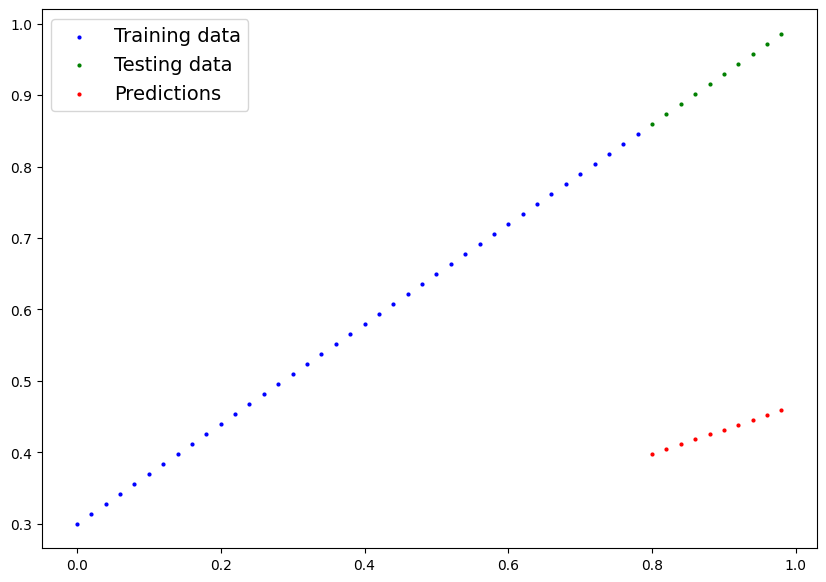

In [22]:
plot_predictions(predictions=y_preds)

In [23]:
with torch.inference_mode():
    y_preds = model_0(X_test)
print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [24]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=1e-2)

In [25]:
epochs = 10

for epoch in range(epochs):
    model_0.train()
    y_preds = model_0(X_train)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    y_preds = model_0(X_test)
    loss = loss_fn(y_preds, y_test)
    print(loss)

tensor(0.4811, grad_fn=<MeanBackward0>)
tensor(0.4676, grad_fn=<MeanBackward0>)
tensor(0.4541, grad_fn=<MeanBackward0>)
tensor(0.4407, grad_fn=<MeanBackward0>)
tensor(0.4272, grad_fn=<MeanBackward0>)
tensor(0.4137, grad_fn=<MeanBackward0>)
tensor(0.4002, grad_fn=<MeanBackward0>)
tensor(0.3868, grad_fn=<MeanBackward0>)
tensor(0.3733, grad_fn=<MeanBackward0>)
tensor(0.3598, grad_fn=<MeanBackward0>)


In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])

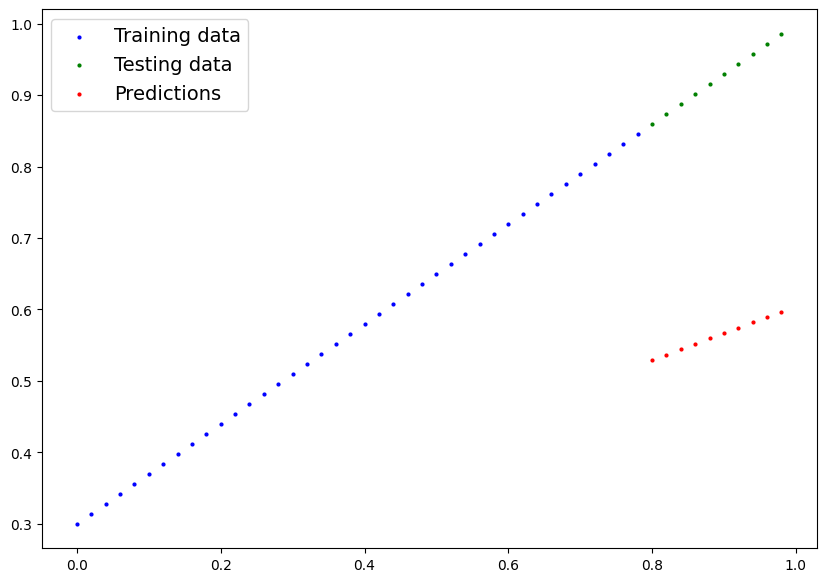

In [28]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)